# Scaler dataframe for Auger Open Data 
### A Neutron Monitor Comparison

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import augerscalerpy.plot_config as pc
from augerscalerpy.scaler_cleaning import scaler_clean, plot_data ## ESTA SÍ ESSSSS LA FORMAAAAAAAAAAA!!!!!!!!


In [5]:
NM = pd.read_csv('NM.csv')
NM

,DATE,TSMB,ATHN,MXCO,ROME,OULU
0,2006-01-01 00:00:00,324.971,54.535,217.712,148.928,101.445
1,2006-01-02 00:00:00,325.676,54.639,219.248,149.769,102.270
2,2006-01-03 00:00:00,325.625,54.759,219.858,150.274,102.841
3,2006-01-04 00:00:00,325.846,54.859,219.925,150.447,103.335
4,2006-01-05 00:00:00,325.585,54.897,219.698,150.377,102.962
...,...,...,...,...,...,...
5656,2021-06-27 00:00:00,null,56.098,229.513,127.708,111.792
5657,2021-06-28 00:00:00,null,55.974,228.834,127.550,111.660
5658,2021-06-29 00:00:00,null,56.076,228.892,127.555,111.742
5659,2021-06-30 00:00:00,null,56.167,229.522,128.031,111.810


## Bases de datos disponibles

#### https://www.nmdb.eu/nest/
#### https://cidas.isee.nagoya-u.ac.jp/WDCCR/station_list.php
#### Las páginas oficiales de las estaciones: http://cr0.izmiran.ru/common/
#### El servicio de IZMIRAN http://cr0.izmiran.ru/rome/main.htm


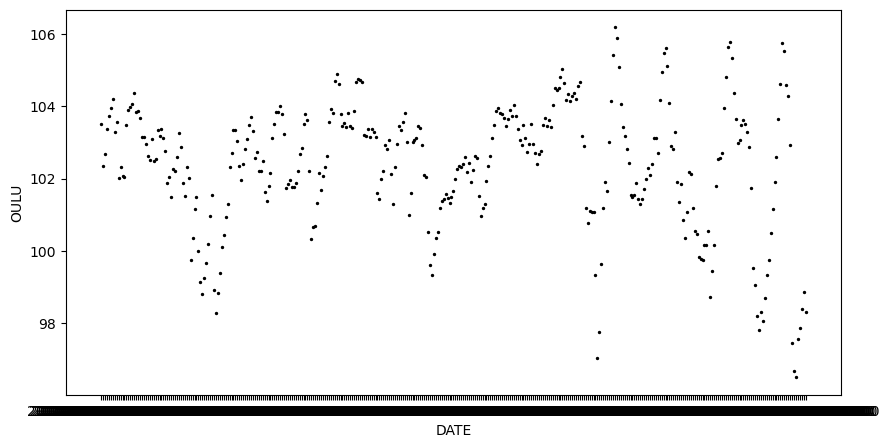

In [7]:
#### ES UN DATO POR DÍA

cutNM = NM[NM['DATE'] >= "2014-01-01"]
cutfNM = cutNM[cutNM['DATE'] <= "2014-12-30" ]
cutfNM.plot(kind='scatter', s= 2, x='DATE',y='OULU', figsize=(10, 5),color='black')
plt.show()

In [8]:
#replacing NaN values

#rigcut['TSMB'] = rigcut['TSMB'].fillna(0)
cutfNM = cutfNM.fillna(0)
cutfNM = cutfNM.replace(to_replace = '   null', value = 0.00)


Hay  (11805, 4) líneas vacías


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


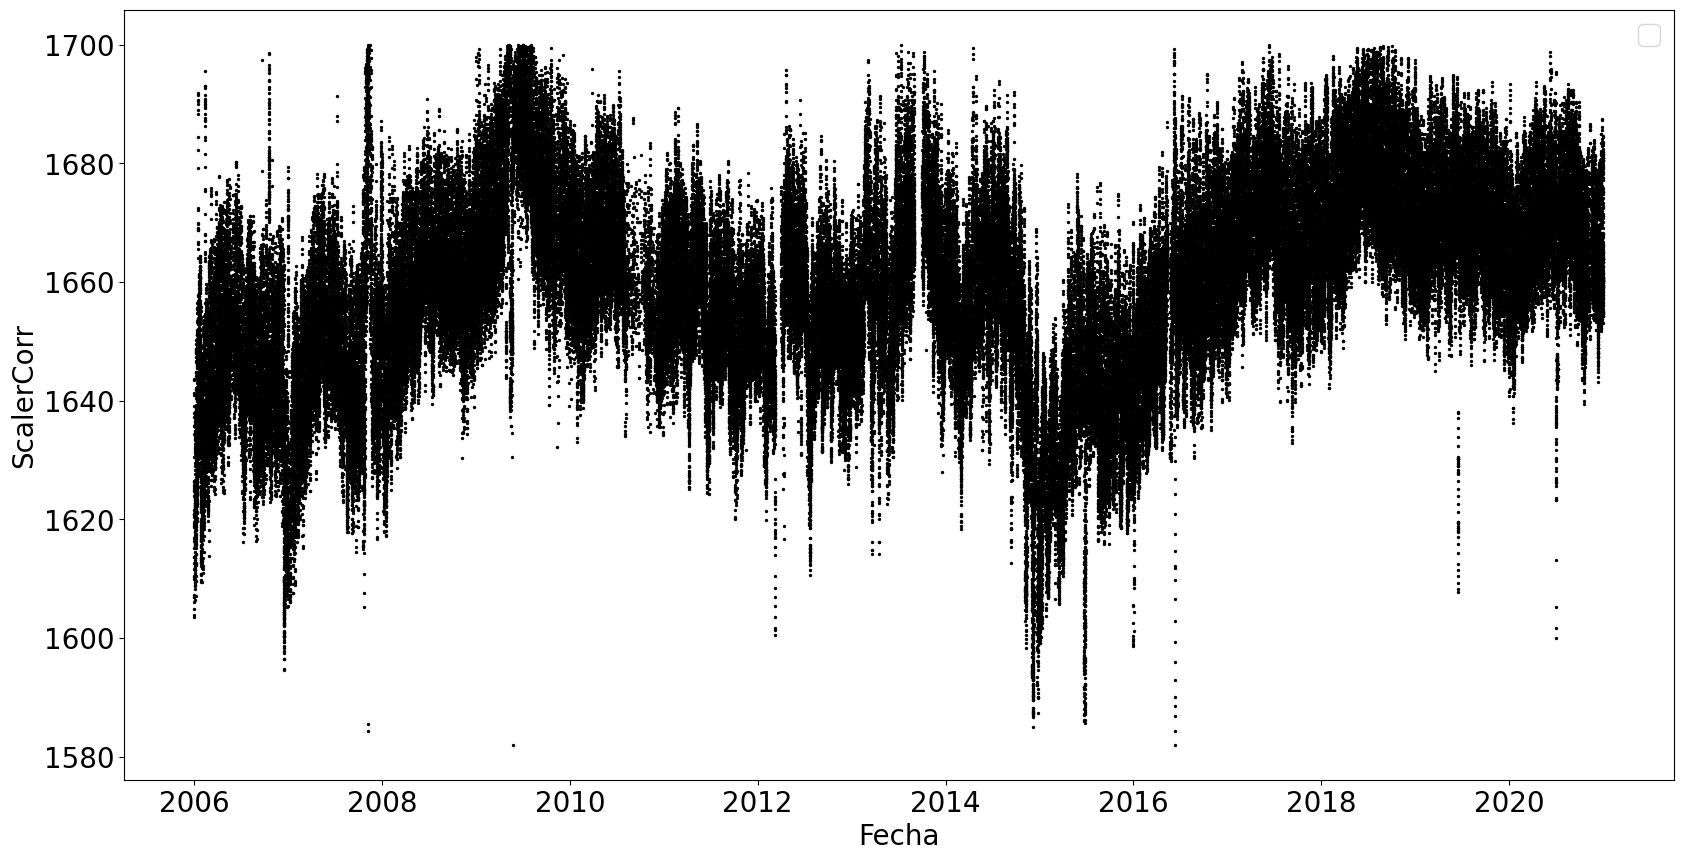

In [5]:
# ADDING SCALER DATASET
scaler3600s = plotscaler('scaler_ALL_hourly_11abril.csv','scaler_hourly')

In [6]:
newrg = pd.to_datetime(cutfNM['DATE'])
cutfNM["DATE"] = newrg.values
cutfNM

,DATE,TSMB,ATHN,MXCO,ROME,OULU
2922,2014-01-01,326.950,56.204,225.494,151.544,103.513
2923,2014-01-02,325.316,55.942,223.761,150.742,102.346
2924,2014-01-03,325.937,56.153,223.950,150.861,102.671
2925,2014-01-04,326.308,56.078,224.279,150.906,103.370
2926,2014-01-05,327.515,56.239,225.293,151.902,103.736
...,...,...,...,...,...,...
3280,2014-12-25,312.086,53.972,214.365,144.966,97.561
3281,2014-12-26,313.895,54.235,215.136,145.624,97.860
3282,2014-12-27,315.171,54.447,216.025,146.442,98.395
3283,2014-12-28,315.447,54.383,216.550,146.507,98.856


In [7]:
cutfNM["TSMB"] = cutfNM["TSMB"].astype(float)
cutfNM["ATHN"] = cutfNM["ATHN"].astype(float)
cutfNM["MXCO"] = cutfNM["MXCO"].astype(float)
cutfNM["ROME"] = cutfNM["ROME"].astype(float)
cutfNM["OULU"] = cutfNM["OULU"].astype(float)

In [8]:
rgnan = cutfNM.replace(0.0, np.nan)
rgnan

,DATE,TSMB,ATHN,MXCO,ROME,OULU
2922,2014-01-01,326.950,56.204,225.494,151.544,103.513
2923,2014-01-02,325.316,55.942,223.761,150.742,102.346
2924,2014-01-03,325.937,56.153,223.950,150.861,102.671
2925,2014-01-04,326.308,56.078,224.279,150.906,103.370
2926,2014-01-05,327.515,56.239,225.293,151.902,103.736
...,...,...,...,...,...,...
3280,2014-12-25,312.086,53.972,214.365,144.966,97.561
3281,2014-12-26,313.895,54.235,215.136,145.624,97.860
3282,2014-12-27,315.171,54.447,216.025,146.442,98.395
3283,2014-12-28,315.447,54.383,216.550,146.507,98.856


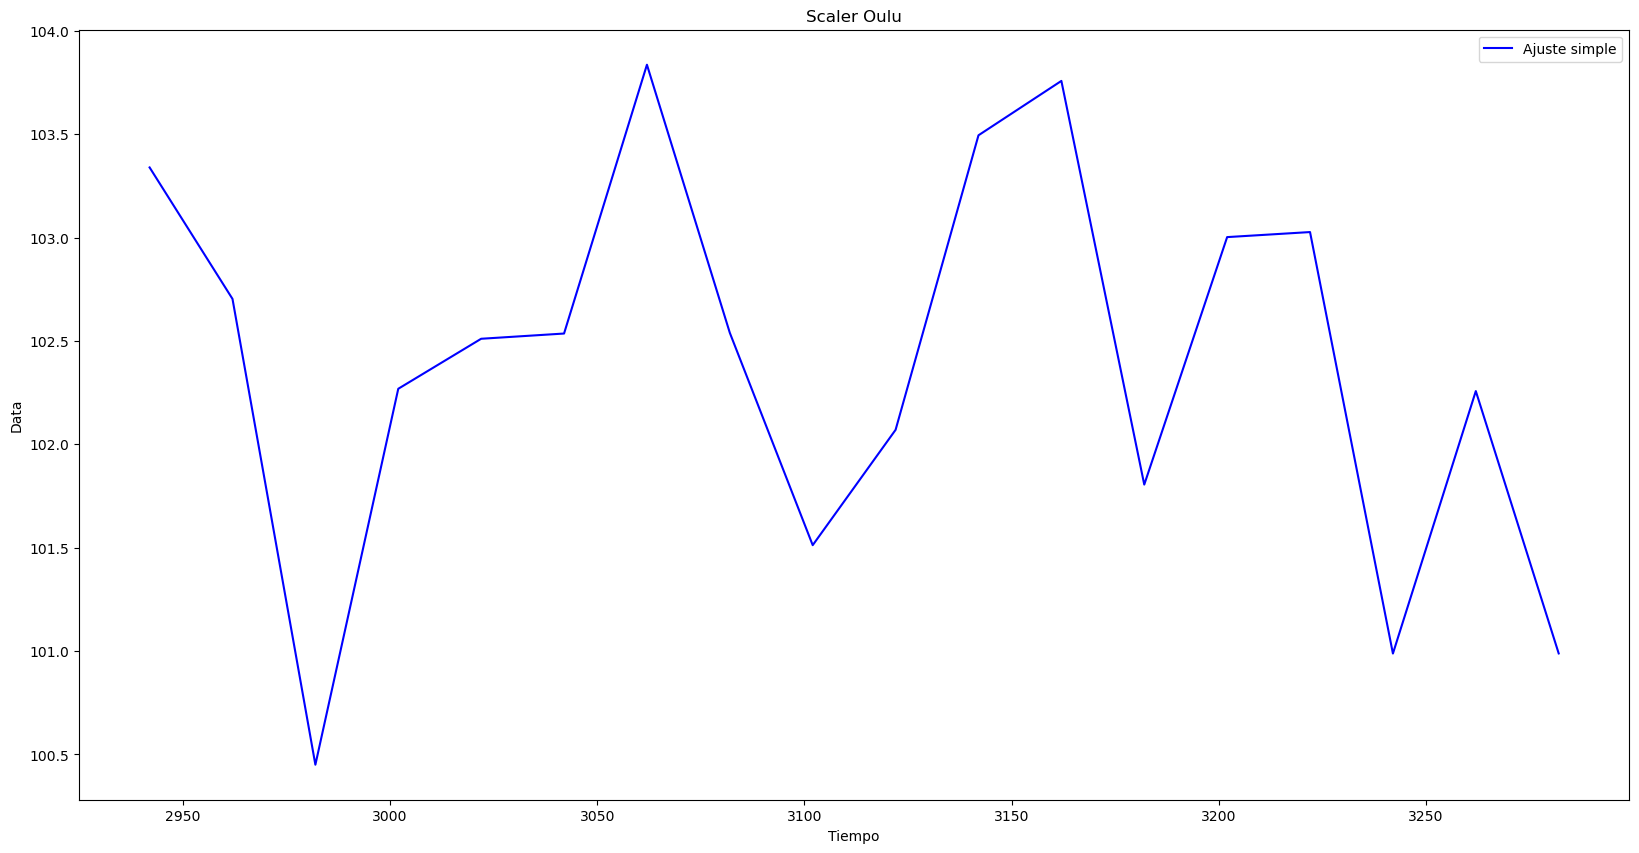

In [9]:
# Calcular promedio móvil de cada 288 datos
promedio_NM = rgnan['OULU'].rolling(20).mean().iloc[::20]

# Graficar curva ajustada al promedio de los datos cada 1000 datos
# Crear figura y especificar tamaño
fig = plt.figure(figsize=(20,10))
plt.plot(promedio_NM.index, promedio_NM.values, 'b-', label='Ajuste simple')
plt.xlabel('Tiempo')
plt.ylabel('Data')
plt.title('Scaler Oulu')
plt.legend()
plt.show()

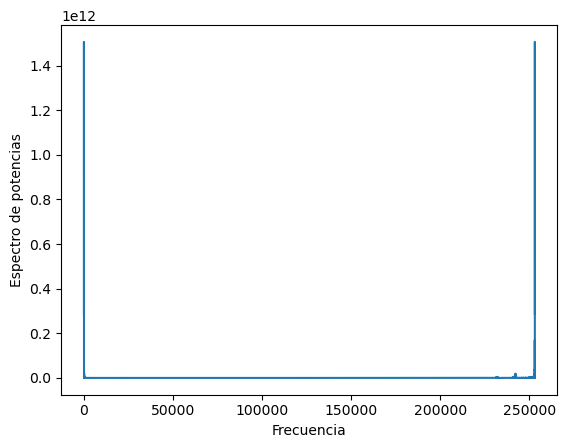

In [10]:
# Seleccionar solo los valores no nulos de la columna "ScalerCorr"
data = scaler3600s['ScalerCorr'].dropna().values

# Calcular la transformada de Fourier y el espectro de potencias
fft_vals = np.fft.fft(data)
power_spectrum = np.abs(fft_vals) ** 2

# Calcular las frecuencias correspondientes a cada punto del espectro
num_samples = len(data)
frequencies = np.arange(num_samples) / num_samples * scaler3600s.index
# Eliminar los valores de frecuencia nulos
power_spectrum = power_spectrum[1:]
frequencies = frequencies[1:]

# Graficar el espectro de potencias
plt.plot(frequencies, power_spectrum)
plt.xlabel('Frecuencia')
plt.ylabel('Espectro de potencias')
plt.show()


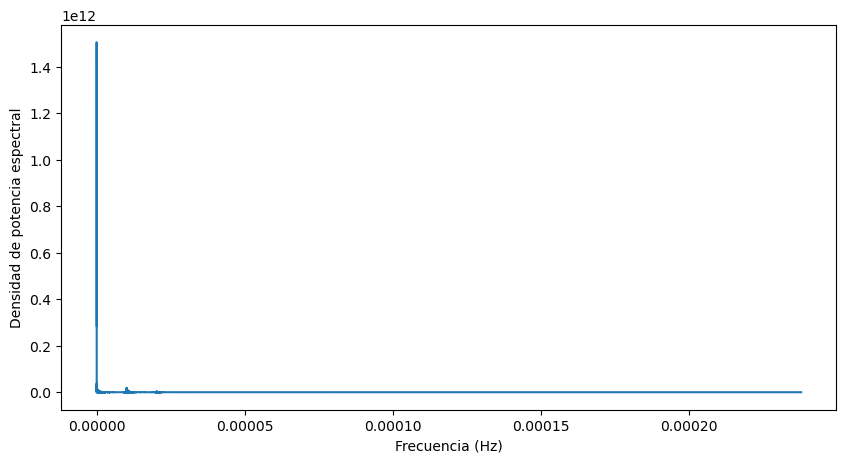

In [11]:
# Crear una serie temporal con la columna Date
time_series = pd.to_datetime(scaler3600s['Date'])

# Calcular la frecuencia de muestreo en segundos
dt = np.mean(np.diff(time_series)).astype('timedelta64[s]').astype(float)

# Calcular el espectro de potencias utilizando la Transformada de Fourier de NumPy
freqs = np.fft.fftfreq(len(scaler3600s['ScalerCorr']), d=dt)
psd = np.abs(np.fft.fft(scaler3600s['ScalerCorr']))**2

# Eliminar los valores negativos de frecuencia y los correspondientes al valor DC
mask = freqs > 0
freqs = freqs[mask]
psd = psd[mask]

# Graficar el espectro de potencias
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(freqs, psd)
ax.set_xlabel('Frecuencia (Hz)')
ax.set_ylabel('Densidad de potencia espectral')
plt.show()


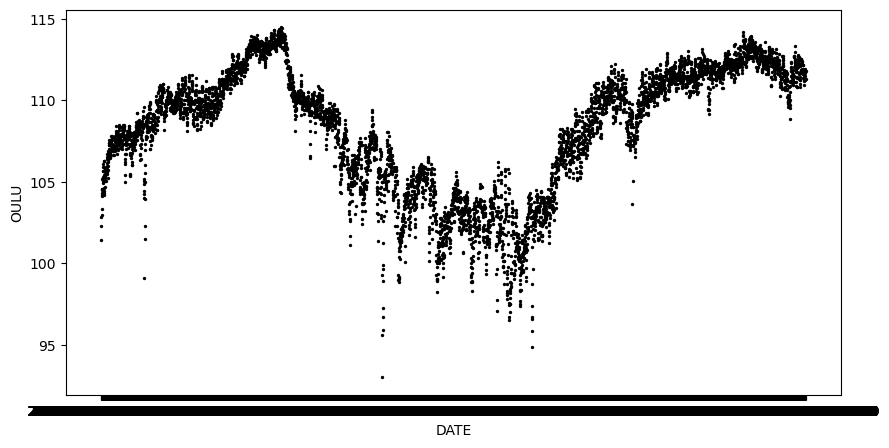

In [13]:
NM.plot(kind='scatter', s= 2, x='DATE',y='OULU', figsize=(10, 5),color='black')
plt.savefig("OULU_variations.png")
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
plt.tick_params(axis='both', labelsize=15)
plt.plot(rgnan['DATE'], ((rgnan['auger'])*0.4)-250, "r", label='Auger (Scaled)')
#plt.plot(rgnan['DATE'], rgnan['MXCO'], "b", label='México')
plt.plot(rgnan['DATE'], rgnan['TSMB']+50, "b", label='Tsumeb')
#plt.plot(rgnan['DATE'], rgnan['ATHN']+260, "g", label='Athenas')
plt.plot(rgnan['DATE'], rgnan['OULU']+250, "m", label='Oulu')

#plt.plot(eventoFDD['YYYY.MM.DD'], ((eventoFDD['imp/min']*0.18)-510)/1640, "black", label='Tsumeb')
#plt.plot(data[:,3], data[:,0], "r")
plt.xlabel("Year",fontsize=16)
plt.ylabel("Rate",fontsize=16)
plt.legend()
plt.savefig('scaler_vs_NM.png')

plt.show()